In [42]:
%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [43]:
import pylab
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import numpy

<h2>Propuesta</h2>
<p>En el experimento propuesto se planea calcular la frecuencia de la letra para diferentes pasajes de los libre
'War an Peace' y 'A tale of two cities', en idioma ingles, y compararlas con la frecuencia promedia de dicha la letra en cada libro</p>
<ul> 
<li>Primero que todo calculamos la frecuenia de la letra A para la totalidad de cada libro</li>
<li>Luego, dividimos cada libro en una cantidad de pasaje igual al numero de experimentos a realizar.
Cada pasaje tendra la misma cantidad de caracteres.</li>
<li>Cada experimento consite entonces en coger cada pasaje, y dividirlo en 10 sub-pasajes. En cada sub-pasaje calculamos la 
la frecuencia de la letra A. Luego utilizando las diferentes frecuencias calculados, encontramos un valor promedio y una desviacion estandar
para la frencuencia de la letra A
en cada pasaje</li>

<li>Finalmente comparmos la frecuencia de la letra A en cada pasaje con respecto a la frecuncia en todo el libro . La hipótesis nula es entonces: $$H_0:\bar{\mu} = 0$$
        La hipótesis alterna es:$$H_1:\bar{\mu} \neq 0$$ 
                
                Calculamos entonces el p-value de la forma 
     
                    $$t = \frac{\bar{\mu} - \mu}{SE}$$ Donde $$SE = \frac{s}{\sqrt{Numero de experimentos}}$$ 
                    
<li>Finalmente variamos el numero de experimentos de 100 a 10000 y caracterizamos
el mínimo, máximo y media de la distribucion de los p-values,  en función del número de experimentos. </li>
</ul>

In [44]:
#A Tale of Two cities
datos= open ("pg98.txt").read()



Ntotal = 0 

Todasletras=[]
    
Lineas = datos.split('\n')

for i in range(len(Lineas)):

        palabras =  Lineas[i].split(' ') 
    
    
        for j in range(len(palabras)):
        
            letras = list(palabras[j])
        
            
            for h in range(len(letras)):
                
                
                Todasletras.append(letras[h])
    
    
   

In [45]:
#War and Peace 
datos2= open ("WarPeace.txt").read()
    

Todasletras2 = []
    
Lineas2 = datos2.split('\n')

for i in range(len(Lineas2)):

        palabras2 =  Lineas2[i].split(' ') 
    
    
        for j in range(len(palabras2)):
        
            letras2 = list(palabras2[j])
        
            
            for h in range(len(letras2)):
                
                
                Todasletras2.append(letras2[h])
    

In [46]:
#calculamos la frecuncia de la letra A para cada libro

NZ = 0
for i in range(len(Todasletras)):
    if (Todasletras[i] == 'A' or Todasletras[i] == 'a'):
        NZ = NZ + 1
        
NZ2 = 0
for i in range(len(Todasletras2)):
    if (Todasletras2[i] == 'A' or Todasletras2[i] == 'a'):
        NZ2 = NZ2 + 1        

In [47]:
print NZ
print NZ2

48167
205807


In [106]:
print 'A tale of Two cities'
print 'Numero de lineas =' + str(len(Lineas))
print 'Numero de letras =' + str(len(Todasletras))
print 'Numero de  veces que aparece la latra A =' + str(NZ)

promTC = 100*float(NZ)/float(len(Todasletras))
 
print 'Frecuencia Z ' + str(promTC) + '%'

print 'War and Peace'
print  'Numero de lineas ='+str(len(Lineas2))
print 'Numero de letras =' +str(len(Todasletras2))
print 'Numero de  veces que aparece la latra A =' + str(NZ2)

promWP = 100*float(NZ2)/float(len(Todasletras2))
print 'Frecuencia A ' + str(promWP) + '%'

A tale of Two cities
Numero de lineas =16272
Numero de letras =649692
Numero de  veces que aparece la latra A =48167
Frecuencia Z 7.41382070273%
War and Peace
Numero de lineas =65008
Numero de letras =2711734
Numero de  veces que aparece la latra A =205807
Frecuencia A 7.58949808499%


In [107]:
def prom(letras):
    
    frec = 0
 
    Nz = 0
    for j in range(len(letras)):
        lt = letras[j]
        if (lt == 'a' or lt == 'A'):
            Nz = Nz + 1 
    
    frec = float(Nz)/float(len(letras))
    
   

    return frec

In [108]:


def divlibro (Nexp):


    
    NletrasT = len(Todasletras)/Nexp
    NletrasT2 = len(Todasletras2)/Nexp

    Arrayexp = []
    Arrayexp2 = []



    for i in range(Nexp):

        letras = []
        for j in range(NletrasT):


            letras.append(Todasletras[i*NletrasT+j])



        Arrayexp.append(letras)
        
    
    for i in range(Nexp):

        letras2 = []
        for j in range(NletrasT2):


            letras2.append(Todasletras2[i*NletrasT2+j])



        Arrayexp2.append(letras2)
        
    
    devuelta = [Arrayexp,Arrayexp2]
    
    return devuelta
 

In [114]:
def experimento (LETRAS,frecletra,Nexp):
    
    
    
    Numeroexp = len(LETRAS)/10
    
    arrayexp2 = []
    
    frecuencia = []
    
    
    for i in range(10):
        letras = []
        for j in range(Numeroexp):       
        
            letras.append(LETRAS[i*Numeroexp+j])
        
        arrayexp2.append(letras)
           

    for h in range(10):
        
        frecuencia.append(100*prom(arrayexp2[h]))
    

    
    promedio = float(sum(frecuencia))/float(len(frecuencia))
   
    
    SE = float(std(frecuencia))/np.sqrt(i)
    pvalue = float(promedio - frecletra)/SE
    
   
    return pvalue

In [116]:
pfinal=[]
pfinal2 = []

Nexperimentos = 500

Datos = divlibro (Nexperimentos)

Arrayexp=Datos[0]
Arrayexp2=Datos[1]

for i in range(len(Arrayexp)):
       
    coso = experimento(Arrayexp[i],promTC,Nexperimentos)
    pfinal.append(coso)
    
    
for i in range(len(Arrayexp2)):
       
    coso2 = experimento(Arrayexp2[i],promWP,Nexperimentos)
    pfinal2.append(coso2)
  


Las graficas que se muestran fuera generadas al realizar 500 experimentos


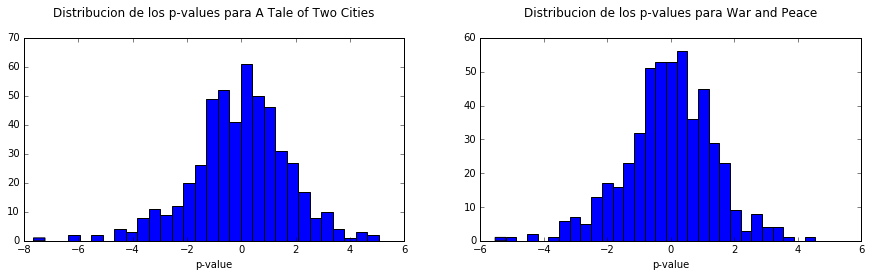

In [127]:
plt.figure(figsize=[15,8])
plt.subplot(222)
plt.hist(pfinal,30) 
xlabel('p-value')
plt.title('Distribucion de los p-values para War and Peace',y=1.08)
plt.subplot(221)
plt.hist(pfinal2, 30)
xlabel('p-value')
plt.title('Distribucion de los p-values para A Tale of Two Cities',y=1.08)

print 'Las graficas que se muestran fuera generadas al realizar 500 experimentos'


In [128]:
def muchos (cuantos):


    pfinal=[]
    pfinal2 = []

    Nexperimentos = cuantos

    Datos = divlibro (Nexperimentos)

    Arrayexp=Datos[0]
    Arrayexp2=Datos[1]

    for i in range(len(Arrayexp)):

        coso = experimento(Arrayexp[i],promTC,cuantos)
        pfinal.append(coso)


    for i in range(len(Arrayexp2)):

        coso2 = experimento(Arrayexp2[i],promWP,cuantos)
        pfinal2.append(coso2)

    
    min1= np.min(pfinal)
    max1= np.max(pfinal)
    mean1=np.mean(pfinal)
    
    primer = [min1,max1,mean1]
    
    min2= np.min(pfinal2)
    max2= np.max(pfinal2)
    mean2=np.mean(pfinal2)
    
    segundo = [min2,max2,mean2]
    


    return [primer,segundo]

In [129]:
cosos = []
NumerExp  = []


minimosW =[]
maximosW=[]
promediosW=[]



minimosTTC=[]
maximosTTC=[]
promediosTTC=[]

for i in range(100,10000,100):
  
    TaleTwoCities = muchos(i)[0]
    
    WarPaece= muchos(i)[1]
    

    minimosW.append(WarPaece[0])
    maximosW.append(WarPaece[1])
    promediosW.append(WarPaece[2])
    
    minimosTTC.append(TaleTwoCities [0])
    maximosTTC.append(TaleTwoCities [1])
    promediosTTC.append(TaleTwoCities [2])
                    
                    
                    
    NumerExp.append(i)
    
   
    
    

 

/home/systemmanager/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in double_scalars


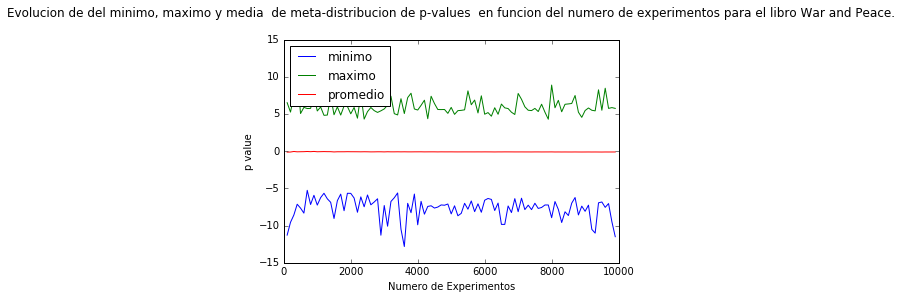

In [130]:
#print NumerExp

plot(NumerExp,minimosW,label='Minimos') 

plot(NumerExp,maximosW,label='Maximos')
plot(NumerExp,promediosW,label='Media')
plt.title('Evolucion de del minimo, maximo y media  de meta-distribucion de p-values  en funcion del numero de experimentos para el libro War and Peace.',y=1.08)


xlabel('Numero de Experimentos')
ylabel('p value')
# Now add the legend with some customizations.
plt.legend(['minimo', 'maximo', 'promedio'], loc='upper left')

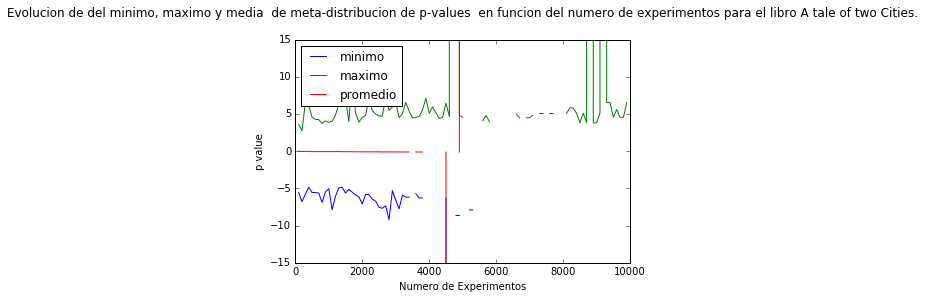

In [133]:
#print NumerExp

plot(NumerExp,minimosTTC,label='Minimos') 

plot(NumerExp,maximosTTC,label='Maximos')
plot(NumerExp,promediosTTC,label='Media')
axis([0,10000,-15,15])

plt.title('Evolucion de del minimo, maximo y media  de meta-distribucion de p-values  en funcion del numero de experimentos para el libro A tale of two Cities.',y=1.08)
xlabel('Numero de Experimentos')
ylabel('p value')
# Now add the legend with some customizations.
plt.legend(['minimo', 'maximo', 'promedio'], loc='upper left')